Convolution Explaination : https://www.youtube.com/watch?v=YRhxdVk_sIs

* torchvision - base library for Pytorch Computer vision
* torchvision.dataset - get dataset and data loading functios for computer vision
* torchvision.models - pretrained models ready to use
* torchvision.transform - functions to manipulate your data



In [ ]:
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import mathplotlib
import matplotlib.pyplot as plt

#check the version of torch vision
print(torchvision.__version__)

0.18.0+cu121


###1. Dataset

Fashion MNIST dataset from torchvision.datasets

In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",
    train = True, #Do we want to train?
    download = True, #Do we want to download?
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
class_names = train_data.classes
image, label = train_data[0]
class_names, image , label

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
print(f"Image shape (Color channel, height, width) : {image.shape} \nImage Label : {label}")

Image shape (Color channel, height, width) : torch.Size([1, 28, 28]) 
Image Label : 9


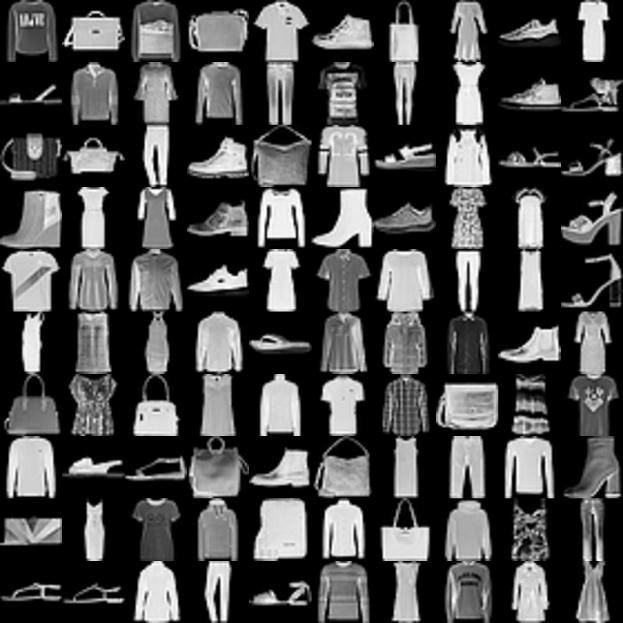

**Note**:  that greyscale has only 1 color channel

###1.2 Visualize the data

Text(0.5, 1.0, '9')

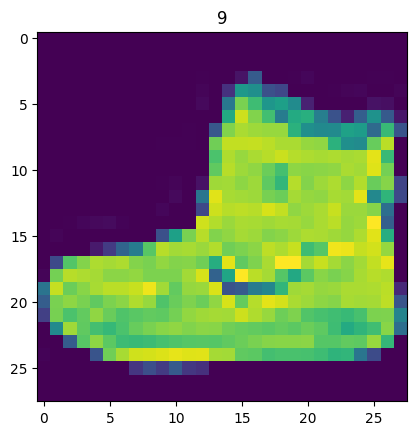

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze())
plt.title(label)

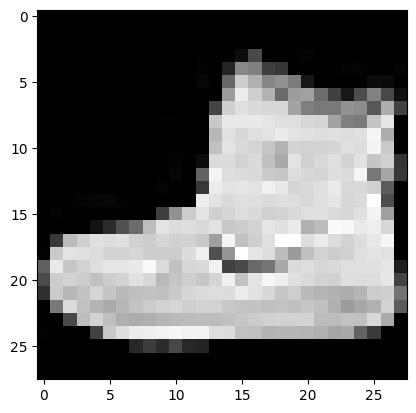

In [ ]:
plt.imshow(image.squeeze(), cmap= "gray")

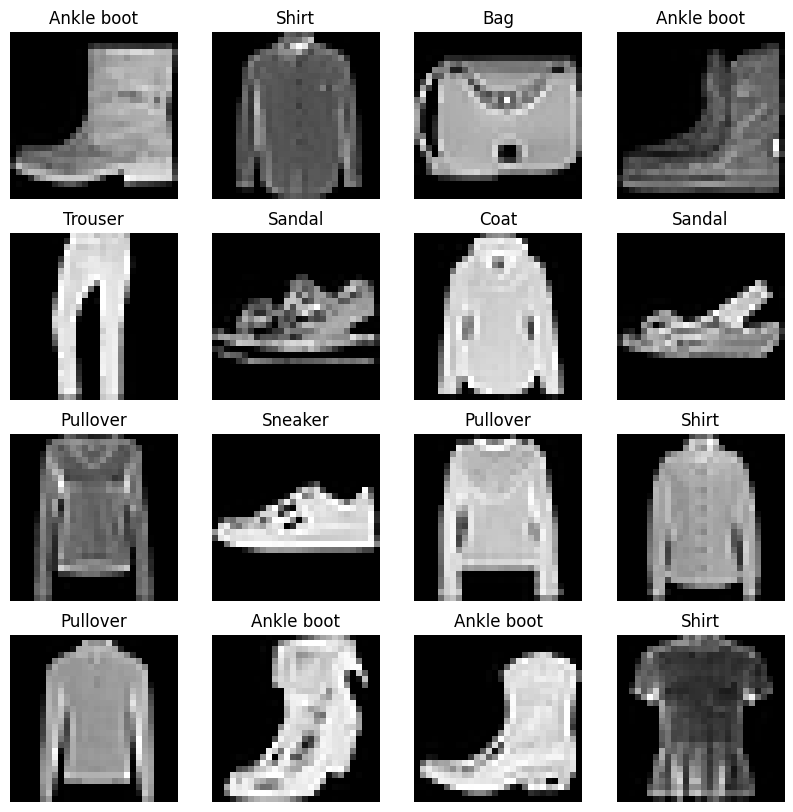

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))
rows, columns = 4, 4
for i in range(1, rows*columns+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx)
  img , label = train_data[random_idx]
  fig.add_subplot(rows, columns, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Dataloader converts PyTorch datasets into Python iterable and more specifically we want to turn our data into mini-batches.
Reason -

>1. It is more computationally efficient, as your computer may not be able to process all of the images in one iteration.
>2. By training the model in batches we can form somewhat accurate predictions realy on and use it to train our model properly. Hence `it gives our model more chances to update its gradient per epoch`.

Src : https://www.youtube.com/watch?v=4qJaSmvhxi8

In [ ]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameters
BATCH_SIZE = 32

train_dataloader = DataLoader(
                              dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True
)

test_dataloader = DataLoader(
                              dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False
)

print(f"train_dataloader : {train_dataloader}, \ntest_dataloader : {test_dataloader}")

train_dataloader : <torch.utils.data.dataloader.DataLoader object at 0x7c1d8d0ba350>, 
test_dataloader : <torch.utils.data.dataloader.DataLoader object at 0x7c1c9fd09b70>


In [ ]:
#Inside of training dataloader
train_features_batch, train_labels_batch  = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 8


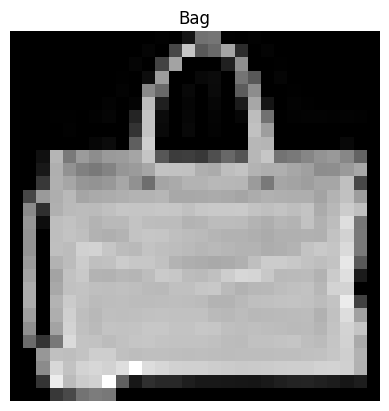

In [ ]:
#show a sample
torch.manual_seed(26)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img , label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label}")

## 3. Model 0:    Baseline Model

In [ ]:
#create a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]
print(f"Original Tensor shape : {x.shape}")

#Flatten the sample
output = flatten_model(x)  #perform forward pass
print(f"Shape after flattening : {output.shape}")
print("That is one contiguous array of size = 28x28, and color channel")
#print(f"Output tensor : {output}")

Original Tensor shape : torch.Size([1, 28, 28])
Shape after flattening : torch.Size([1, 784])
That is one contiguous array of size = 28x28, and color channel


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__() #inheriting all the methods of nn.Module
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
                  in_features=input_shape,
                  out_features=hidden_units
        ),
        nn.Linear(
                  in_features=hidden_units,
                  out_features=output_shape
        )
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape = 28*28, #28*28
    hidden_units = 10,
    output_shape = len(class_names) #one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
#dummy forward pass
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup the loss, optimizer and evaluation metrics

* loss function =   `nn.CrossEntropyLoss()`
* Optimizer = `torch.optim.SGD`
* Evaluation metric = we can use accuracy as evaluation metric
> Accuracy can be accessed by

>> 1.   Torch.Accuracy
2.  write accuracy_fn()
3.  use the helperfunction library from github



                      

In [ ]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download ... ")
else:
  print("Downloading helper_functions.py ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
    print("Download complete")



helper_functions.py already exists, skipping download ... 


In [ ]:
#import the accuracy metric
from helper_functions import accuracy_fn

#Set up the loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
                            params = model_0.parameters(),
                            lr = 0.01
)

##3.2 Creating a Time Function

Two of the main things we want to track in model testing and training are
1. Model's performance (loss, accccuracy)
2. How fast it runs
**Note**: `timeit` is a default python library which has a fucntion `default_timer` and we are using this function primarily to time the execution of a code

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device: torch.device = None):
  """Prints difference between start and end time

    Args :
          start :  time of starting in float
          end   :  time of ending in float
          device :  specify the device in which model is trained
    return :
            returns the total time of training

  """
  total_time = end - start
  print(f"Total Train Time on {device} : {total_time: .3f} secs")
  return total_time


In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Total Train Time on cpu :  0.000 secs


3.430699962336803e-05

##3.3 Creating the training loop and training the model in batches

1. Loop through epochs
2. Loop though training batches, perform training steps, calculate the train loss `per batch`
3. Loop through testing batches, perform testing steps, calculate the test loss and accuracy `per batch`
4. Print out the output
5. Time it all


In [ ]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#Set the number of epochs for faster training time
epochs = 3

#Create training and test loop
for epoch in tqdm(range(epochs)):  #NOTE: tqdm is used as wrapper on iterable
  print(f"Epoch: {epoch}\n")

  ##Training in batches
  train_loss = 0

  #Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward Pass
    y_pred = model_0(X) #Since this is a linear model, it will only return one value, is the prediction probability

    #2. Calculate the loss(per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulating the losses of all the batches

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Backpropagation
    loss.backward()

    #5. Step the optimizer
    optimizer.step()

    #Print the output
    if batch % 400 == 0:
      print(f"Looked at : {batch * len(X)}/ {len(train_dataloader.dataset)}")

  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)    #average loss per epoch

  ##Testing

  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X, y  in test_dataloader:

      #1. forward pass
      test_pred = model_0(X)

      #2. Calculate the loss accumulatively
      test_loss += loss_fn(test_pred, y)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    #calculate the average test loss per batch
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  #print output
  print(f"Train loss : {train_loss:.4f} | Test loss : {test_loss:.4f} | Test Accuracy : {test_acc:.4f}\n")

train_time_end_on_cpu = timer()
total_train_time_0 = print_train_time(start=train_time_start_on_cpu,
                                        end=train_time_end_on_cpu,
                                        device=str(next(model_0.parameters()).device)
                                        )


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Looked at : 0/ 60000
Looked at : 12800/ 60000
Looked at : 25600/ 60000
Looked at : 38400/ 60000
Looked at : 51200/ 60000
Train loss : 0.9096 | Test loss : 0.6290 | Test Accuracy : 78.6342

Epoch: 1

Looked at : 0/ 60000
Looked at : 12800/ 60000
Looked at : 25600/ 60000
Looked at : 38400/ 60000
Looked at : 51200/ 60000
Train loss : 0.5573 | Test loss : 0.5441 | Test Accuracy : 81.1302

Epoch: 2

Looked at : 0/ 60000
Looked at : 12800/ 60000
Looked at : 25600/ 60000
Looked at : 38400/ 60000
Looked at : 51200/ 60000
Train loss : 0.5027 | Test loss : 0.5137 | Test Accuracy : 81.9988

Total Train Time on cpu :  39.039 secs


`I dont know why it is not working!!!`

In [ ]:
from tqdm import tqdm

#Mearsure time
from timeit import default_timer as timer
train_time_start_model_0 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}----\n")
  train_step(model=model_0,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
  test_step(model=model_0,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn,
           device=device)
train_time_end_model_0 = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_model_0,
                                            end=train_time_end_model_0,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0----


Train Loss: 0.47653 | Train acc: 83.47%
 


 33%|███▎      | 1/3 [00:13<00:26, 13.16s/it]


Test Loss: 0.49442 | Test acc: 82.79% 

Epoch 1----


Train Loss: 0.46025 | Train acc: 84.01%
 


 67%|██████▋   | 2/3 [00:26<00:13, 13.13s/it]


Test Loss: 0.48361 | Test acc: 83.07% 

Epoch 2----


Train Loss: 0.44881 | Train acc: 84.48%
 


100%|██████████| 3/3 [00:39<00:00, 13.02s/it]


Test Loss: 0.47221 | Test acc: 83.23% 

Total Train Time on cpu :  39.055 secs


In [ ]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

NameError: name 'eval_model' is not defined

## 6. Model 1: Building a better module with Non-Linearity ie CNN

In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#create a model with no-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
              input_shape: int,
              hidden_units: int,
              output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),   #flasttens the input tensor to vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
  )

  def forward(self, x: torch.Tensor):
      return self.layer_stack(x)

#Create an instance of the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 784, #28x28 image units
              hidden_units= 10,
              output_shape= len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
#setting loss_fn
loss_fn = torch.nn.CrossEntropyLoss();

#setting optimizer
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.01);

#setting up accuracy function
from helper_functions import accuracy_fn



### 6.2 Functionising training and evaluation/testing loops

* Training Loop - `train_step()`
* Testing Loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """Performs a training step with a model trying to learn on data_loader
  Args:
        model : nn.Module
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn,
        device: torch.device = device

    Return:


  """

  train_loss, train_acc = 0,0
  model.to(device)
  model.train()
  for batch, (X,y) in enumerate(data_loader): #make the dataloader iterable

    #Put data in target data
    X, y = X.to(device), y.to(device)

    #1. Forward Pass
    y_pred = model(X)

    #2. calculate the loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss  #accumulate train loss for batches
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) #logits --> prediction labels

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss Backwards()
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #Print out whats happening


  #Divide total train loss
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"\nTrain Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n ")





In [ ]:
def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  """Performs a testing loop step on model doing over test dataloader

    Args:
        model : nn.Module
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device: torch.device = device

    Return:
  """

  test_acc, test_loss = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      #Send the data tp target device
      X,y = X.to(device), y.to(device)

      #1. Forward Pass
      test_pred = model(X)

      #2. Calculate test_loss, test_acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) #logits-->pred_labels

    #3. Average the metrics and print out

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"\nTest Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}% \n")





In [ ]:
torch.manual_seed(42)

#Measure time
from tqdm import tqdm
from timeit import default_timer as timer
train_time_start_on = timer()

#Set epochs
epoch = 3

#Create an optimization and evaluation loop with train_step() and test_step()

for epoch in tqdm(range(epoch)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_on = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on,
                                            end=train_time_end_on,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------

Train Loss: 1.42179 | Train acc: 54.29%
 


 33%|███▎      | 1/3 [00:21<00:43, 21.62s/it]


Test Loss: 1.10519 | Test acc: 63.05% 

Epoch: 1
---------

Train Loss: 1.03357 | Train acc: 64.58%
 


 67%|██████▋   | 2/3 [00:42<00:21, 21.25s/it]


Test Loss: 0.98050 | Test acc: 65.74% 

Epoch: 2
---------

Train Loss: 0.95979 | Train acc: 66.12%
 


100%|██████████| 3/3 [01:02<00:00, 20.81s/it]


Test Loss: 0.93682 | Test acc: 66.79% 

Total Train Time on cpu :  62.440 secs


how to make your models run faster: https://horace.io/brrr_intro.html
Things to note:
1. Bandwidth
2. Overhead
3. Copying from memory to CPU and vice versa

In [ ]:
#Fuctionise results from a model

torch.manual_seed(42)

def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    model.to(device)
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [ ]:
# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9601633548736572,
 'model_acc': 65.625}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN is know for their capabilities to find patterns in data which can be
* straight lines
* curves
* right angles

More complex CNNs can detect complex shapes such as silhouette of a dog or cat

* For a better understanding of CNN: https://poloclub.github.io/cnn-explainer/
* Types of CNN architechs: https://medium.com/@navarai/unveiling-the-diversity-a-comprehensive-guide-to-types-of-cnn-architectures-9d70da0b4521


In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
#import mathplotlib
import matplotlib.pyplot as plt

In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",
    train = True, #Do we want to train?
    download = True, #Do we want to download?
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)


In [ ]:
class_names = train_data.classes
image, label = train_data[0]


In [ ]:
#Create a Convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG - CNN explainer site
  """

  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*49,  #there is a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
      x = self.conv_block_1(x)
      #print(f"Output shape Conv_block_1: {x.shape}")
      x = self.conv_block_2(x)
      #print(f"Output shape Conv_block_2: {x.shape}")
      x = self.classifier(x)
      #print(f"Output shape classifier: {x.shape}")
      return x



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
              input_shape= 1, #No. of color channels
              hidden_units= 10,
              output_shape= len(class_names)).to(device)


In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`
Doc: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d


In [ ]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Images batch shape: {images.shape}")
print(f"Single Image shape: {test_image.shape}")
print(f"Test image \n: {test_image}")



Images batch shape: torch.Size([32, 3, 64, 64])
Single Image shape: torch.Size([3, 64, 64])
Test image 
: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [ ]:
test_image.shape #color channel first

torch.Size([3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)
#pass the data through the convolutional layer
conv_output = conv_layer(test_image) # test_image.unsqueeze()
conv_output.shape

torch.Size([10, 64, 64])

In [ ]:
conv_output.shape, test_image.shape

(torch.Size([10, 64, 64]), torch.Size([3, 64, 64]))

### 7.2 Stepping through `nn.Maxpool2d()`

In [ ]:
#Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqeezed shape: {test_image.unsqueeze(0).shape}")

#Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=(2,2),
                              stride=2)

#pass data through the conv_layer
test_image_through_conv  = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

#Pass data through the max pool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and maxxpool: {test_image_through_conv_and_maxpool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image unsqeezed shape: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and maxxpool: torch.Size([1, 10, 32, 32])


Test image original shape: torch.Size([3, 64, 64])
Test image unsqeezed shape: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and maxxpool: torch.Size([1, 10, 31, 31])

In [ ]:
torch.manual_seed(42)
#Create a random tensor with a similar no. of dimensions
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

#Pass the random tensro through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"Max pool tensor : {max_pool_tensor}")
print(f"Max pool tensor shape : {max_pool_tensor.shape}")

Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor : tensor([[[[0.3367]]]])
Max pool tensor shape : torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2



In [ ]:
#setup up the loss function, eval matrix, accuracy function
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)

### 7.4 Training and testing model_2 with `train_step()` and `test_step()`

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from tqdm import tqdm
from timeit import default_timer as timer
train_time_start_at_model_2 = timer()

epochs = 3
for epochs in tqdm(range(epochs)):
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_at_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]


Train Loss: 0.37130 | Train acc: 86.71%
 


 33%|███▎      | 1/3 [01:00<02:00, 60.45s/it]


Test Loss: 0.37842 | Test acc: 86.71% 


Train Loss: 0.35507 | Train acc: 87.19%
 


 67%|██████▋   | 2/3 [01:59<00:59, 59.47s/it]


Test Loss: 0.37362 | Test acc: 86.90% 


Train Loss: 0.34193 | Train acc: 87.70%
 


100%|██████████| 3/3 [02:58<00:00, 59.65s/it]


Test Loss: 0.35629 | Test acc: 87.38% 

Total Train Time on cpu :  178.955 secs


In [ ]:
model_2_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3562885820865631,
 'model_acc': 87.38019169329074}

In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3562885820865631,
 'model_acc': 87.38019169329074}

Improving the model_2
Doc: https://medium.com/bokchilab/optimizing-the-tinyvgg-model-for-cifar-10-classification-with-mlops-ee8a697eecb5

Changes Made:
* 1.  lr=0.1 optimizer = torch.optim.SGD()
> Result: {'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}
* 2.  lr=0.01, optimizer = torch.optim.Adam()
>Result: {'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3668612539768219,
 'model_acc': 86.9408945686901}
* 3. lr=0.01, optimizer= torch.optim.SGD() epochs=5
>Result: {'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3285203278064728,
 'model_acc': 88.21884984025559}
* 4. lr=0.005 optimizer= torch.optim.SGD() epochs=3
> Result: {'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3910347521305084,
 'model_acc': 86.28194888178913}
* 5. lr=0.01 optimizer= optimizer= torch.optim.SGD() epochs=3
>Result: {'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4408051073551178,
 'model_acc': 84.21525559105432}


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

NameError: name 'model_0_results' is not defined

In [ ]:
#Add training time to results comparision
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [ ]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 0 (T-shirt/top)


Text(0.5, 1.0, 'T-shirt/top')

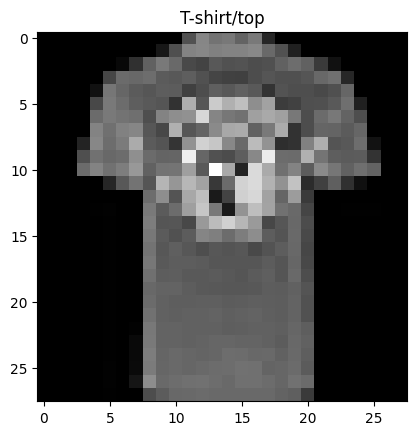

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_0,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[9.2099e-01, 1.3799e-02, 9.2597e-03, 9.0874e-03, 1.4391e-03, 7.1113e-08,
         4.4842e-02, 1.2864e-06, 5.8410e-04, 2.5563e-06],
        [2.1686e-08, 1.1885e-10, 5.6027e-06, 7.5376e-09, 8.0877e-07, 5.1382e-05,
         8.5505e-07, 1.0117e-06, 9.9994e-01, 3.0301e-07]])

In [ ]:
#pred_probs --> labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 8, 0, 1, 9, 4, 3, 9, 2])

In [ ]:
test_labels

[0, 8, 0, 1, 9, 4, 3, 9, 2]

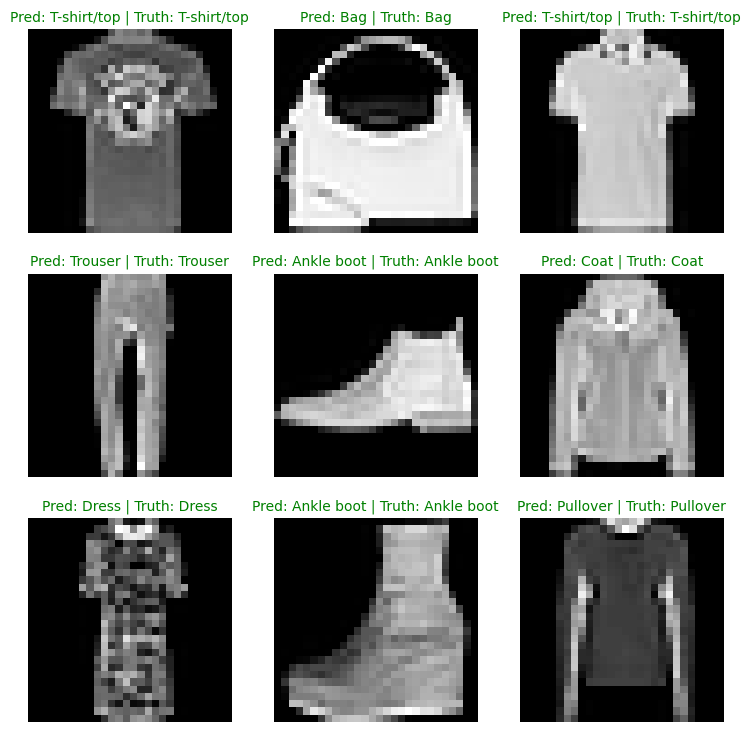

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 10. Making Confusion Matrix

1. Make predictions with our trained model on test dataset
2. Make confusion matrix `torchmetrics.ConfusionMatrix`
Doc - https://lightning.ai/docs/torchmetrics/stable/
3. Plot confusion matrix using `mlxtend.plotting.plot.confusion matrix()`
Doc - https://rasbt.github.io/mlxtend/

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X,y = X.to(device), y.to(device)
    y_logit = model_2(X)

    #logits --> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    #Put y_pred in cpu
    y_preds.append(y_pred.cpu())

print(y_preds)
y_pred_tensor = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 3, 2, 4, 8, 0, 2, 7, 7, 5,
        3, 6, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 7, 6, 7, 2, 3, 2, 6, 4, 2, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 3, 8]), tensor([6, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 7, 1, 8, 4, 6, 1, 2, 5, 1, 6, 0, 0, 4, 6, 3, 3, 2, 2, 6, 4,
        3, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 8, 0, 9, 2, 7, 4, 2, 0, 5, 4, 1, 2, 1, 3, 0, 8, 1, 0, 9, 3, 6,
        7, 9, 5, 4, 4, 7, 6, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 3, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 3, 8, 4, 1, 3,
        3, 6, 7, 2, 8, 5, 3, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 3, 9, 2, 2, 8, 6, 4,
        3, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 6, 6, 3, 8, 9, 6, 1, 3, 6, 2, 3, 0, 8, 3, 7, 4,
       

In [ ]:
#See if required packages are installed nad if not install them
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should ve higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(mlxtend.__version__)



mlxtend version 0.23.1


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [ ]:
class_names = train_data.classes

In [ ]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_data.targets  #pytorch refers the labels are targets

tensor([9, 2, 1,  ..., 8, 1, 5])

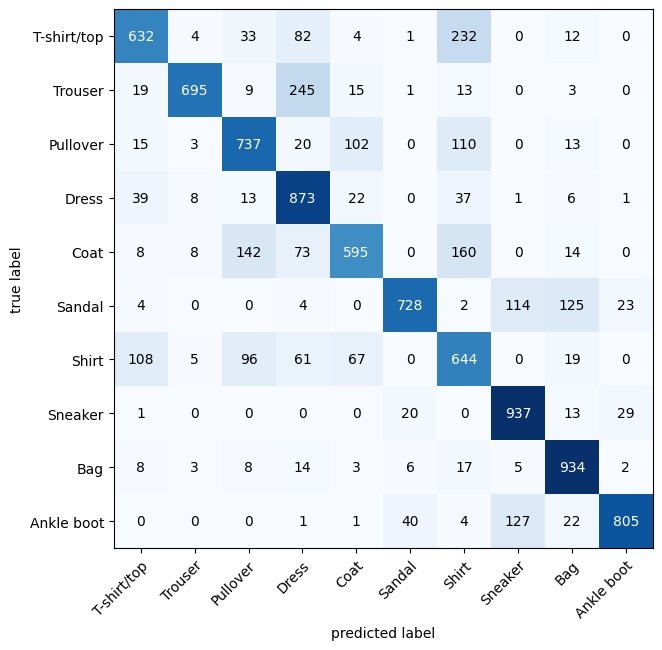

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion instance and compare predictiosn to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#3. Plot the confusion matrix
fig, axis = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), #matplotlib is compatible with numpy
    class_names = class_names,
    figsize=(10,7)
)

In [ ]:
confmat_tensor

tensor([[632,   4,  33,  82,   4,   1, 232,   0,  12,   0],
        [ 19, 695,   9, 245,  15,   1,  13,   0,   3,   0],
        [ 15,   3, 737,  20, 102,   0, 110,   0,  13,   0],
        [ 39,   8,  13, 873,  22,   0,  37,   1,   6,   1],
        [  8,   8, 142,  73, 595,   0, 160,   0,  14,   0],
        [  4,   0,   0,   4,   0, 728,   2, 114, 125,  23],
        [108,   5,  96,  61,  67,   0, 644,   0,  19,   0],
        [  1,   0,   0,   0,   0,  20,   0, 937,  13,  29],
        [  8,   3,   8,  14,   3,   6,  17,   5, 934,   2],
        [  0,   0,   0,   1,   1,  40,   4, 127,  22, 805]])

## 11. Save and Load Best performing model

In [ ]:
from pathlib import Path

#create model directoru path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#Create model save
MODEL_NAME = "03_Pytorch_Computer_Vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_Pytorch_Computer_Vision_model_2.pth


In [ ]:
#create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                           hidden_units=10,
                                           output_shape= len(class_names)).to(device)
#loading in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3562885820865631,
 'model_acc': 87.38019169329074}

In [ ]:
#Evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3562885820865631,
 'model_acc': 87.38019169329074}

In [ ]:
#check if model results are close
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)